In [29]:
# Importing required libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Data', 'Logistic Regression Assignment.ipynb']

In [3]:
pwd

'C:\\Users\\saqib\\Logistic Regression Assignment iNeuron'

In [4]:
datapath = 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data/AReM.zip'

In [30]:
# Extracting zip file containing different folders

In [5]:
import zipfile as zf
files = zf.ZipFile('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data/AReM.zip', 'r')
files.extractall('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data')
files.close()

In [6]:
os.listdir('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data')

['AReM.zip',
 'bending1',
 'bending2',
 'bendingType.pdf',
 'cycling',
 'lying',
 'sensorsPlacement.pdf',
 'sitting',
 'standing',
 'walking']

In [7]:
# We will remove zip and pdf files now
os.remove('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data/AReM.zip')
os.remove('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data/bendingType.pdf')
os.remove('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data/sensorsPlacement.pdf')

In [8]:
os.listdir('C:/Users/saqib/Logistic Regression Assignment iNeuron/Data')

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

In [9]:
# Getting path of all csv files
import glob
datapath = []
path_of_the_directory= 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data'
folderpath = list(glob.glob(path_of_the_directory+"/*"))
for folder in folderpath: 
    filepath = list(glob.glob(folder+'/*'))
    for files in filepath:
        datapath.append(files)  

In [10]:
datapath

['C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset1.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset2.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset3.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset4.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset5.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset6.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending1\\dataset7.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending2\\dataset1.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending2\\dataset2.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending2\\dataset3.csv',
 'C:/Users/saqib/Logistic Regression Assignment iNeuron/Data\\bending2\\dataset4.csv',
 'C:/Users/saqib/Logistic Regression Assign

In [31]:
# Merging data from different excel file to a single dataframe

In [12]:
df = pd.DataFrame()
for i in datapath:
    col = i.split('\\')[1]
    df_sample = pd.read_csv(i,skiprows=4,error_bad_lines=False)
    df_col = pd.DataFrame()
    df_col['Classfication'] = np.repeat(col,df_sample.shape[0])
    df = pd.concat([df,pd.concat([df_sample,df_col],axis=1)],axis=0)

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [13]:
df.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Classfication
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [14]:
df.Classfication.value_counts()

lying       7200
standing    7200
walking     7200
sitting     7199
cycling     7198
bending1    3360
bending2    2880
Name: Classfication, dtype: int64

In [15]:
# Our target values are imbalanced

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42237 entries, 0 to 479
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  42237 non-null  object 
 1   avg_rss12        41757 non-null  float64
 2   var_rss12        41757 non-null  float64
 3   avg_rss13        41757 non-null  float64
 4   var_rss13        41757 non-null  float64
 5   avg_rss23        41757 non-null  float64
 6   var_rss23        41757 non-null  float64
 7   Classfication    42237 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.9+ MB


In [17]:
df.drop('# Columns: time',axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42237 entries, 0 to 479
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_rss12      41757 non-null  float64
 1   var_rss12      41757 non-null  float64
 2   avg_rss13      41757 non-null  float64
 3   var_rss13      41757 non-null  float64
 4   avg_rss23      41757 non-null  float64
 5   var_rss23      41757 non-null  float64
 6   Classfication  42237 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [19]:
df.shape

(42237, 7)

In [25]:
df.to_csv(r'C:\Users\saqib\Logistic Regression Assignment iNeuron\df.csv',index=False)

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'Data',
 'df.csv',
 'Logistic Regression Assignment.ipynb']

In [2]:
df = pd.read_csv('df.csv')

In [4]:
# Performing EDA using Pandas Profiling

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# We have 0.9% of missing values so we have to handle them

In [7]:
for i in df.columns:
    print("Column ",i," have ", df[i].isna().sum(), " null values")

Column  avg_rss12  have  480  null values
Column  var_rss12  have  480  null values
Column  avg_rss13  have  480  null values
Column  var_rss13  have  480  null values
Column  avg_rss23  have  480  null values
Column  var_rss23  have  480  null values
Column  Classfication  have  0  null values


In [8]:
# Visualizing the positions of missing value in dataset

<AxesSubplot:>

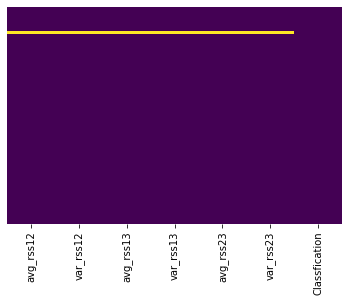

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

We will drop NA values because this missing values may generate at the time of data extracting through different files,
and entire rows are missing and can cause data repetition if filled my mean or median.

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(41757, 7)

<AxesSubplot:>

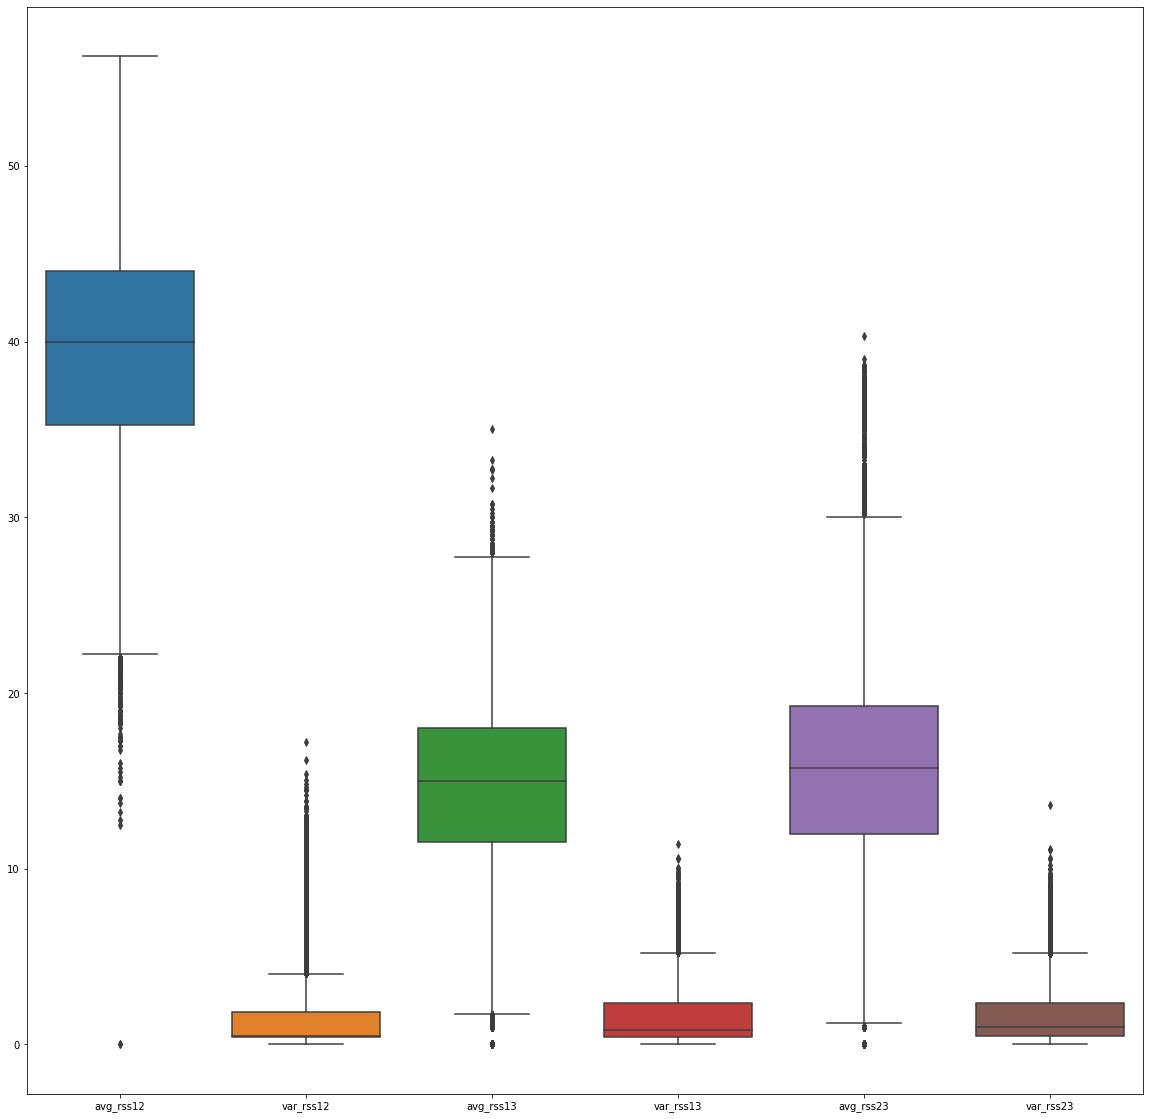

In [5]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df,ax=ax)

In [6]:
q = df['var_rss12'].quantile(0.98)
df_new = df[df['var_rss12'] < q]
print("Initial rows {0}, Rows after removing some outliers {1}".format(df.shape[0],df_new.shape[0]))

Initial rows 41757, Rows after removing some outliers 40919


<AxesSubplot:>

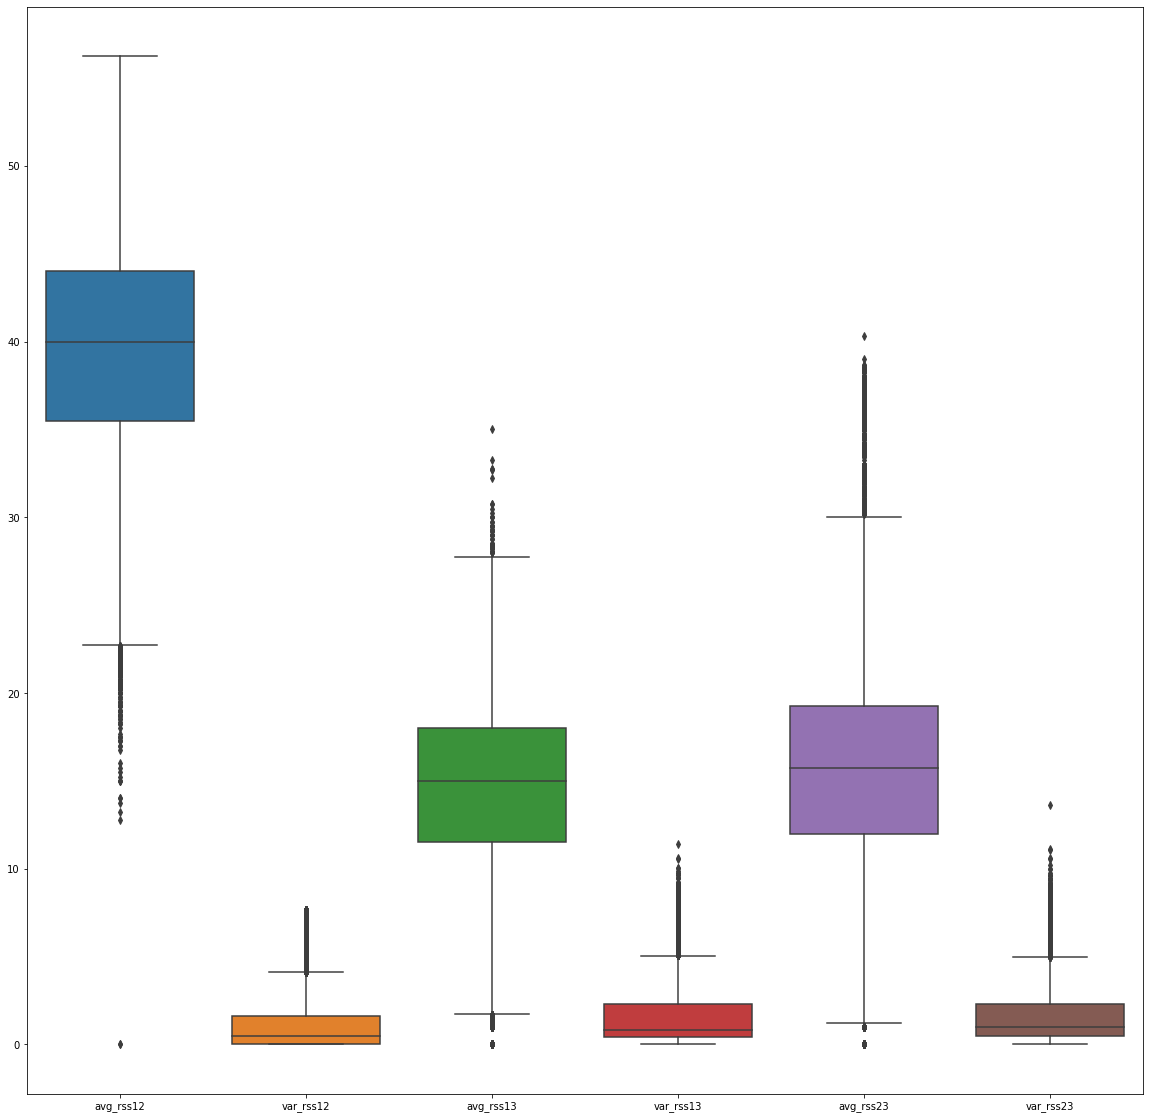

In [7]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df_new,ax=ax)

In [8]:
df_new.shape

(40919, 7)

In [9]:
q = df_new['avg_rss23'].quantile(0.98)
df_new = df_new[df_new['avg_rss23'] < q]
print("Initial rows {0}, Rows after removing some outliers {1}".format(df.shape[0],df_new.shape[0]))

Initial rows 41757, Rows after removing some outliers 40096


<AxesSubplot:>

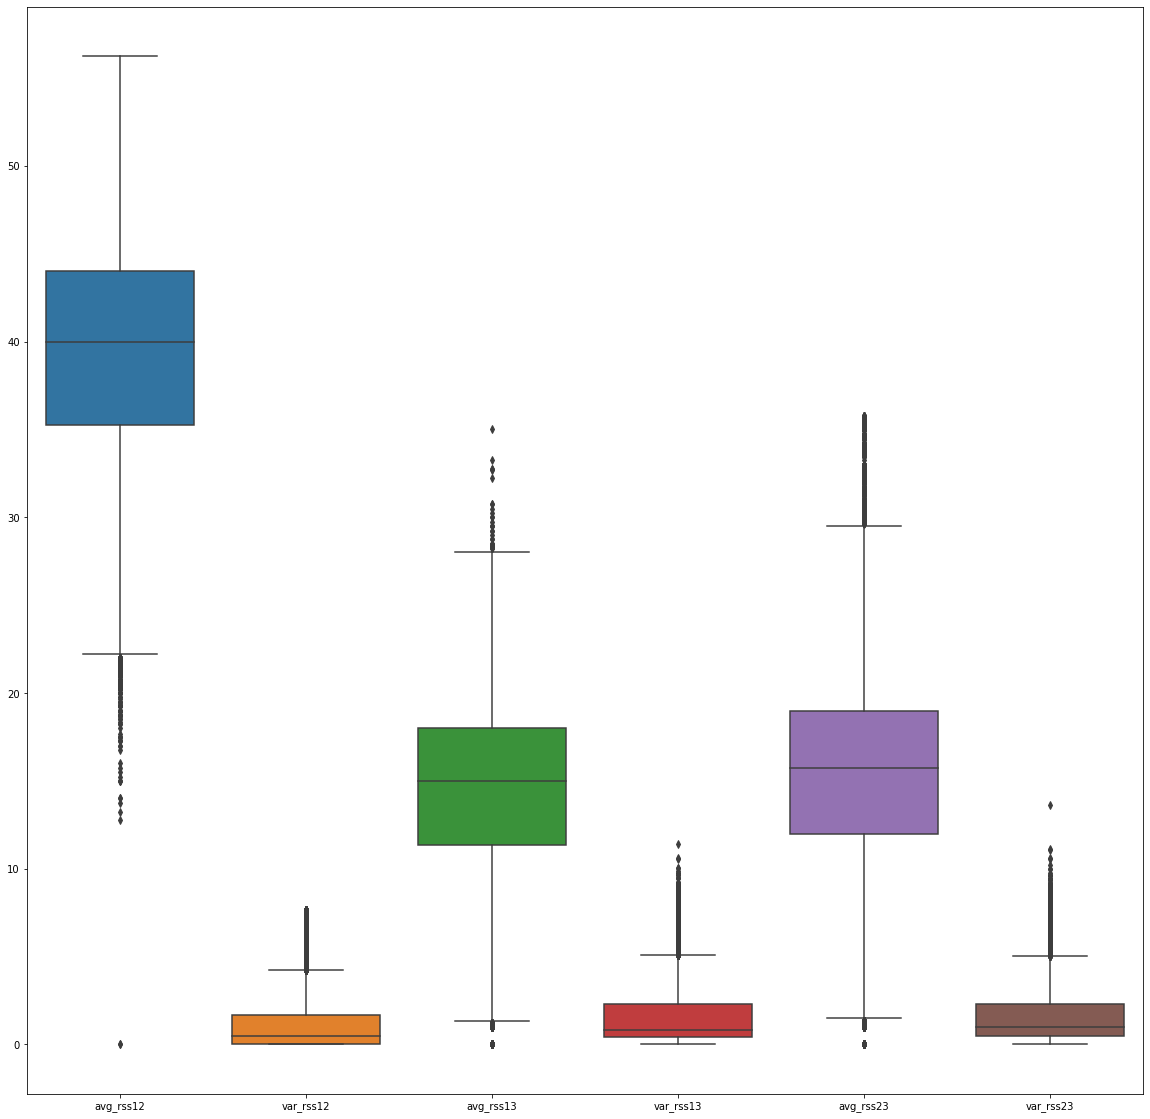

In [10]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df_new,ax=ax)

In [11]:
df_new.shape

(40096, 7)

In [12]:
q = df_new['avg_rss23'].quantile(0.98)
df_new = df_new[df_new['avg_rss23'] < q]
print("Initial rows {0}, Rows after removing some outliers {1}".format(df.shape[0],df_new.shape[0]))

Initial rows 41757, Rows after removing some outliers 39257


<AxesSubplot:>

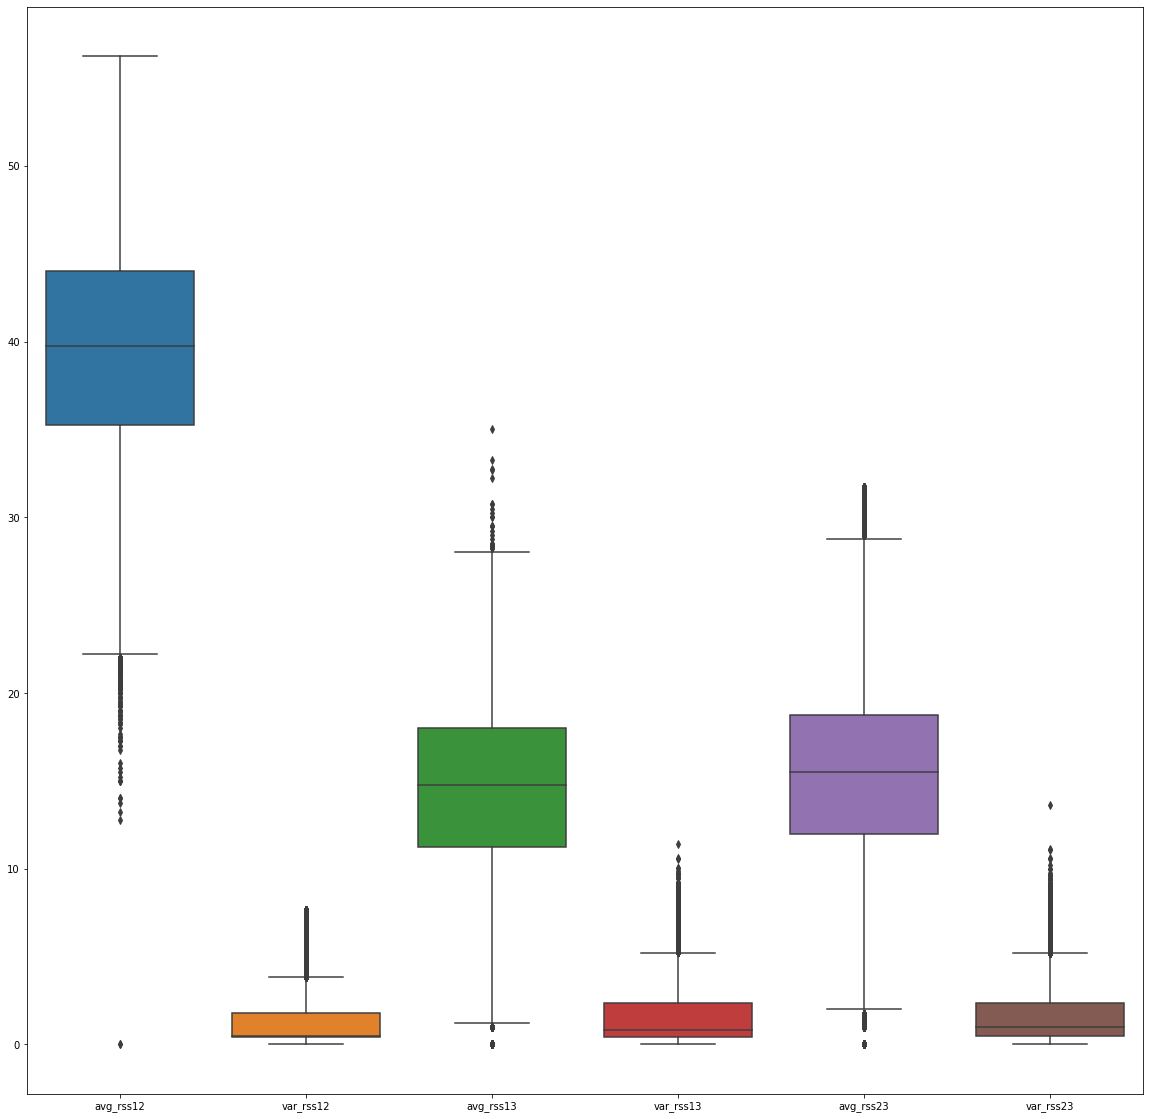

In [13]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df_new,ax=ax)

In [14]:
# After removing some outliers we lost our 2484 rows but still outliers are present
df.shape[0] - df_new.shape[0]

2500

In [15]:
# Now we will replace outlier with median of that feature

In [16]:
def outlier_remover(df):
    for i in df.select_dtypes(include = "float"):
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        upper, lower = df[i].quantile(0.75)+(1.5*IQR) , df[i].quantile(0.25)-(1.5*IQR)
        
        # We will use median to replace outliers because mean may affect data because it is sensitive to outliers 
        med = df[i].median()
        for row in df.index:
            if (df.loc[row,i] > upper or df.loc[row,i] < lower):
                df.loc[row,i] = df[i].median()

In [17]:
outlier_remover(df_new)

(39257, 7)

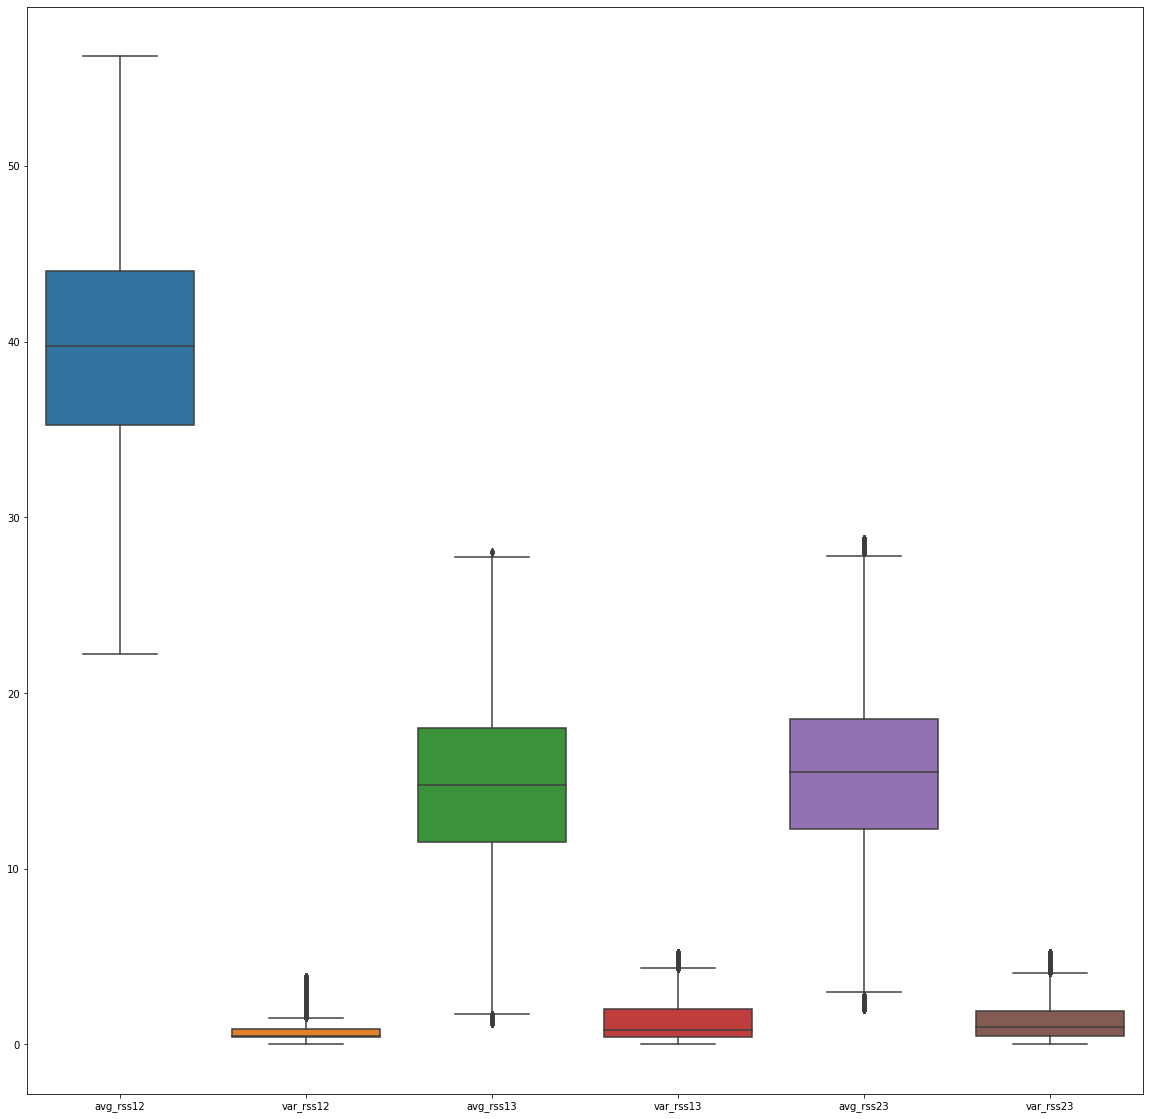

In [18]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df_new,ax=ax)
df_new.shape

In [19]:
print("Initial rows {0}, Rows after removing some outliers {1}".format(df.shape[0],df_new.shape[0]))

Initial rows 41757, Rows after removing some outliers 39257


In [20]:
# Now outliers have removed to a very good extent

In [21]:
# Evaluating Variance Inflation Factor and Scaling the data
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])



In [22]:
vif_score(df_new.select_dtypes(include='float'))

,FEATURE,VIF_SCORE
0,avg_rss12,1.142041
1,var_rss12,1.342676
2,avg_rss13,1.183216
3,var_rss13,1.502592
4,avg_rss23,1.171460
5,var_rss23,1.482820


In [23]:
# VIF between the features are less than 10, so we will consider all the features in our Machine Learning Model

<AxesSubplot:xlabel='Classfication', ylabel='count'>

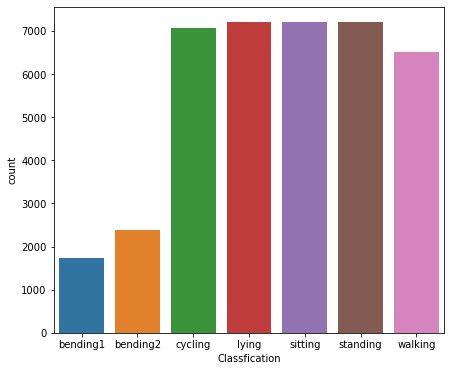

In [24]:
# Visualizing imbalanced data

plt.figure(figsize=(7,6))
sns.countplot(df_new.Classfication)


In [25]:
# Dataset have imbalanced data

In [26]:
x = df_new.drop('Classfication',axis=1)
y = df_new['Classfication']

In [33]:
# Scaling again so that our code looks neat and clean
sc = StandardScaler()
x_scaled = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .2 , random_state = 42,stratify=y)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31405, 6), (7852, 6), (31405,), (7852,))

In [36]:
# Our target feature is imbalance
y_train.value_counts()

standing    5760
sitting     5758
lying       5758
cycling     5646
walking     5206
bending2    1898
bending1    1379
Name: Classfication, dtype: int64

<AxesSubplot:xlabel='Classfication', ylabel='count'>

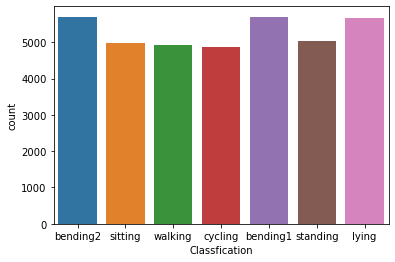

In [35]:
# Oversampling or balancing the imbalance data

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_res, y_res = smk.fit_resample(x_train,y_train)

sns.countplot(y_res)

In [37]:
y_res.value_counts()

bending1    5703
bending2    5682
lying       5680
standing    5034
sitting     4972
walking     4934
cycling     4879
Name: Classfication, dtype: int64

In [38]:
# Now our data is balance

In [39]:
# Building ML Model - Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Using lbfgs solver

In [50]:
logr_lbfgs = LogisticRegression(multi_class='multinomial',solver='lbfgs')
logr_lbfgs.fit(x_train,y_train)
y_pred_lbfgs = logr.predict(x_test)

In [65]:
print('Accuracy score for training is : ', logr_lbfgs.score(x_train,y_train))
print('Accuracy score for test is : ', logr_lbfgs.score(x_test,y_test))
confusion_matrix(y_test,y_pred_lbfgs)
print('\nClassification Report : ')
pd.DataFrame(classification_report(y_test,y_pred_lbfgs,target_names=['bending1','bending2','cycling','lying','sitting',
                                                                     'standing','walking'],output_dict=True))

Accuracy score for training is :  0.583856073873587
Accuracy score for test is :  0.5830361691288843

Classification Report : 


,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.418803,0.566265,0.589228,0.724244,0.422892,0.604108,0.592308,0.583036,0.559693,0.577849
recall,0.284058,0.495781,0.643059,0.815278,0.428472,0.592361,0.532667,0.583036,0.541668,0.583036
f1-score,0.338515,0.528684,0.614968,0.767070,0.425664,0.598177,0.560907,0.583036,0.547712,0.578753
support,345.000000,474.000000,1412.000000,1440.000000,1440.000000,1440.000000,1301.000000,0.583036,7852.000000,7852.000000


## Using liblinear solver

In [52]:
logr_sag = LogisticRegression(multi_class='multinomial',solver='sag')
logr_sag.fit(x_train,y_train)
y_pred_sag = logr_sag.predict(x_test)

In [66]:
print('Accuracy score for training is : ', logr_sag.score(x_train,y_train))
print('Accuracy score for test is : ', logr_sag.score(x_test,y_test))
confusion_matrix(y_test,y_pred_sag)
print('\nClassification Report : ')
pd.DataFrame(classification_report(y_test,y_pred_sag,target_names=['bending1','bending2','cycling','lying','sitting',
                                                                     'standing','walking'],output_dict=True))

Accuracy score for training is :  0.5838242318102213
Accuracy score for test is :  0.5831635252165054

Classification Report : 


,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.418803,0.566265,0.589610,0.723798,0.423182,0.604108,0.592656,0.583164,0.559775,0.577947
recall,0.284058,0.495781,0.643059,0.815278,0.428472,0.592361,0.533436,0.583164,0.541778,0.583164
f1-score,0.338515,0.528684,0.615176,0.766819,0.425811,0.598177,0.561489,0.583164,0.547810,0.578868
support,345.000000,474.000000,1412.000000,1440.000000,1440.000000,1440.000000,1301.000000,0.583164,7852.000000,7852.000000


## Using saga solver

In [54]:
logr_saga = LogisticRegression(multi_class='multinomial',solver='saga')
logr_saga.fit(x_train,y_train)
y_pred_saga = logr_saga.predict(x_test)

In [67]:
print('Accuracy score for training is : ', logr_saga.score(x_train,y_train))
print('Accuracy score for test is : ', logr_saga.score(x_test,y_test))
confusion_matrix(y_test,y_pred_saga)
print('\nClassification Report : ')
pd.DataFrame(classification_report(y_test,y_pred_saga,target_names=['bending1','bending2','cycling','lying','sitting',
                                                                     'standing','walking'],output_dict=True))

Accuracy score for training is :  0.583856073873587
Accuracy score for test is :  0.5830361691288843

Classification Report : 


,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.418803,0.566265,0.589228,0.723798,0.423182,0.604108,0.592308,0.583036,0.559670,0.577820
recall,0.284058,0.495781,0.643059,0.815278,0.428472,0.592361,0.532667,0.583036,0.541668,0.583036
f1-score,0.338515,0.528684,0.614968,0.766819,0.425811,0.598177,0.560907,0.583036,0.547697,0.578734
support,345.000000,474.000000,1412.000000,1440.000000,1440.000000,1440.000000,1301.000000,0.583036,7852.000000,7852.000000


## Using newton-cg

In [56]:
logr_newton = LogisticRegression(multi_class='multinomial',solver='newton-cg')
logr_newton.fit(x_train,y_train)
y_pred_newton = logr_newton.predict(x_test)

In [68]:
print('Accuracy score for training is : ', logr_newton.score(x_train,y_train))
print('Accuracy score for test is : ', logr_newton.score(x_test,y_test))
print(confusion_matrix(y_test,y_pred_newton))
print('\nClassification Report : ')
pd.DataFrame(classification_report(y_test,y_pred_newton,target_names=['bending1','bending2','cycling','lying','sitting',
                                                                     'standing','walking'],output_dict=True))

Accuracy score for training is :  0.5837923897468555
Accuracy score for test is :  0.5830361691288843
[[  98    0   28    2  181   35    1]
 [  29  235   38   52   74    8   38]
 [  15   21  908    3   95   20  350]
 [   0   27    0 1174   56  157   26]
 [  84   92   56  232  617  328   31]
 [   8    2   28  155  363  853   31]
 [   0   38  483    4   72   11  693]]

Classification Report : 


,bending1,bending2,cycling,lying,sitting,standing,walking,accuracy,macro avg,weighted avg
precision,0.418803,0.566265,0.589228,0.723798,0.423182,0.604108,0.592308,0.583036,0.559670,0.577820
recall,0.284058,0.495781,0.643059,0.815278,0.428472,0.592361,0.532667,0.583036,0.541668,0.583036
f1-score,0.338515,0.528684,0.614968,0.766819,0.425811,0.598177,0.560907,0.583036,0.547697,0.578734
support,345.000000,474.000000,1412.000000,1440.000000,1440.000000,1440.000000,1301.000000,0.583036,7852.000000,7852.000000
